C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\ex_input.jpg


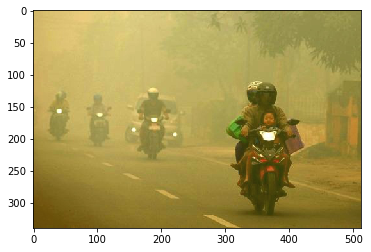

In [1]:
"""Single image dehazing."""
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

class Channel_value:
    val = -1.0
    intensity = -1.0


def find_intensity_of_atmospheric_light(img, gray):
    top_num = int(img.shape[0] * img.shape[1] * 0.001)
    toplist = [Channel_value()] * top_num
    dark_channel = find_dark_channel(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            val = img.item(y, x, dark_channel)
            intensity = gray.item(y, x)
            for t in toplist:
                if t.val < val or (t.val == val and t.intensity < intensity):
                    t.val = val
                    t.intensity = intensity
                    break

    max_channel = Channel_value()
    for t in toplist:
        if t.intensity > max_channel.intensity:
            max_channel = t

    return max_channel.intensity


def find_dark_channel(img):
    return np.unravel_index(np.argmin(img), img.shape)[2]


def clamp(minimum, x, maximum):
    return max(minimum, min(x, maximum))


def dehaze(img, light_intensity, windowSize, t0, w):
    size = (img.shape[0], img.shape[1])

    outimg = np.zeros(img.shape, img.dtype)

    for y in range(size[0]):
        for x in range(size[1]):
            x_low = max(x-(windowSize//2), 0)
            y_low = max(y-(windowSize//2), 0)
            x_high = min(x+(windowSize//2), size[1])
            y_high = min(y+(windowSize//2), size[0])

            sliceimg = img[y_low:y_high, x_low:x_high]

            dark_channel = find_dark_channel(sliceimg)
            t = 1.0 - (w * img.item(y, x, dark_channel) / light_intensity)

            outimg.itemset((y,x,0), clamp(0, ((img.item(y,x,0) - light_intensity) / max(t, t0) + light_intensity), 255))
            outimg.itemset((y,x,1), clamp(0, ((img.item(y,x,1) - light_intensity) / max(t, t0) + light_intensity), 255))
            outimg.itemset((y,x,2), clamp(0, ((img.item(y,x,2) - light_intensity) / max(t, t0) + light_intensity), 255))
    return outimg


def main():
    imageName = r'C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\ex_input.jpg' #eg. fg5.jpg
    img = cv2.imread(imageName)
    print(imageName)
    #cv2.namedWindow('name')
    cv2.namedWindow("result", cv2.WINDOW_AUTOSIZE)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    light_intensity = find_intensity_of_atmospheric_light(img, gray)
    w = 0.95
    t0 = 0.55
    outimg = dehaze(img, light_intensity, 20, t0, w)
    name = imageName+'_out_t0'+str(t0)+'_w'+str(w)+'.jpg'
    roh = mpimg.imread(r'C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\ex_input.jpg_out_t00.55_w0.95.jpg')
    imgplot = plt.imshow(roh)
    cv2.imwrite(name, outimg)

if __name__ == "__main__": main()

In [ ]:
"""Single image dehazing."""
from __future__ import division
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

class Channel_value:
    val = -1.0
    intensity = -1.0


def find_intensity_of_atmospheric_light(img, gray):
    top_num = int(img.shape[0] * img.shape[1] * 0.001)
    toplist = [Channel_value()] * top_num
    dark_channel = find_dark_channel(img)

    for y in range(img.shape[0]):
        for x in range(img.shape[1]):
            val = img.item(y, x, dark_channel)
            intensity = gray.item(y, x)
            for t in toplist:
                if t.val < val or (t.val == val and t.intensity < intensity):
                    t.val = val
                    t.intensity = intensity
                    break

    max_channel = Channel_value()
    for t in toplist:
        if t.intensity > max_channel.intensity:
            max_channel = t

    return max_channel.intensity


def find_dark_channel(img):
    return np.unravel_index(np.argmin(img), img.shape)[2]


def clamp(minimum, x, maximum):
    return max(minimum, min(x, maximum))


def dehaze(img, light_intensity, windowSize, t0, w):
    size = (img.shape[0], img.shape[1])

    outimg = np.zeros(img.shape, img.dtype)

    for y in range(size[0]):
        for x in range(size[1]):
            x_low = max(x-(windowSize//2), 0)
            y_low = max(y-(windowSize//2), 0)
            x_high = min(x+(windowSize//2), size[1])
            y_high = min(y+(windowSize//2), size[0])

            sliceimg = img[y_low:y_high, x_low:x_high]

            dark_channel = find_dark_channel(sliceimg)
            t = 1.0 - (w * img.item(y, x, dark_channel) / light_intensity)

            outimg.itemset((y,x,0), clamp(0, ((img.item(y,x,0) - light_intensity) / max(t, t0) + light_intensity), 255))
            outimg.itemset((y,x,1), clamp(0, ((img.item(y,x,1) - light_intensity) / max(t, t0) + light_intensity), 255))
            outimg.itemset((y,x,2), clamp(0, ((img.item(y,x,2) - light_intensity) / max(t, t0) + light_intensity), 255))
    return outimg


def main():
    imageName = r'C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\fg.jpg' #eg. fg5.jpg
    roh1 = mpimg.imread( r'C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\fg.jpg')
    imgplot = plt.imshow(roh1)
    img = cv2.imread(imageName)
    print(imageName)
    #cv2.namedWindow('name')
    cv2.namedWindow("result", cv2.WINDOW_AUTOSIZE)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    light_intensity = find_intensity_of_atmospheric_light(img, gray)
    w = 0.95
    t0 = 0.55
    outimg = dehaze(img, light_intensity, 20, t0, w)
    name = imageName+'_out_t0qw'+str(t0)+'_w'+str(w)+'.jpg'
    roh = mpimg.imread(r'C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\fg.jpg_out_t0qw0.55_w0.95.jpg')
    imgplot = plt.imshow(roh)
    cv2.imwrite(name, outimg)

if __name__ == "__main__": main()

C:\Users\TEMP\Desktop\fog\SingleImageHazeRemover\sample\fg.jpg
